# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [29]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


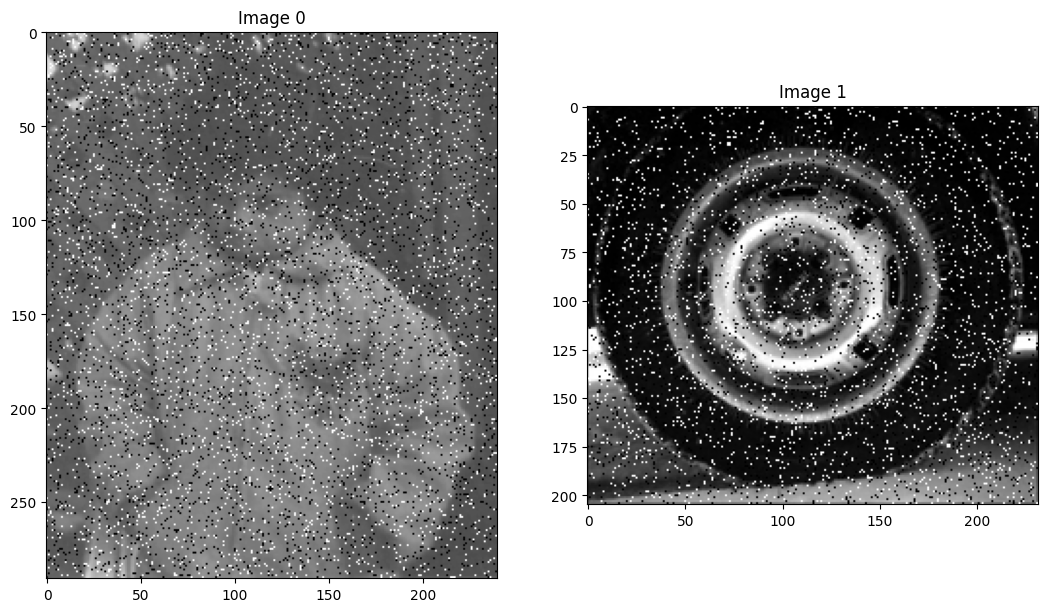

In [30]:
img0 = io.imread('pout.tif')
img1 = io.imread('tire.tif')

img0 = random_noise(img0, mode="s&p", amount=0.1)
img1 = random_noise(img1, mode="s&p", amount=0.1)

show_images([img0, img1], ['Image 0', 'Image 1'])

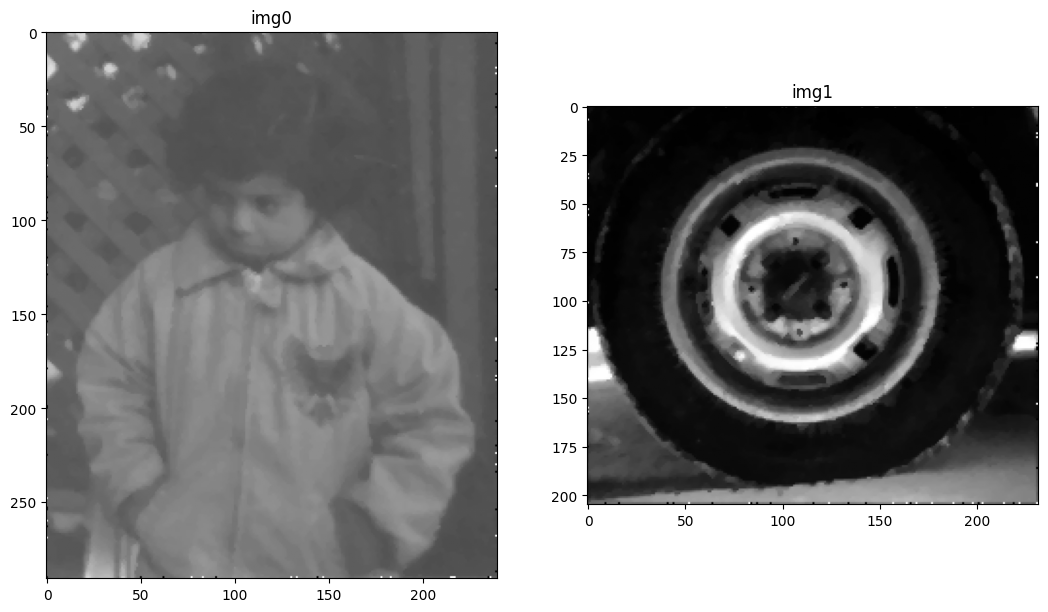

In [31]:
'''
(1) Your own median filter algorithm
'''
def custom_median_filter(img: np.ndarray) -> np.ndarray:
    row, col = img.shape
    ret = img.copy()
    for i in range(1, row-1):
        for j in range(1, col-1):
            matrix = ret[i-1:i+2, j-1:j+2]
            median = np.median(matrix)
            ret[i, j] = median
    return ret
ret0 = custom_median_filter(img0)
ret1 = custom_median_filter(img1)
show_images([ret0, ret1], ['img0', 'img1'])

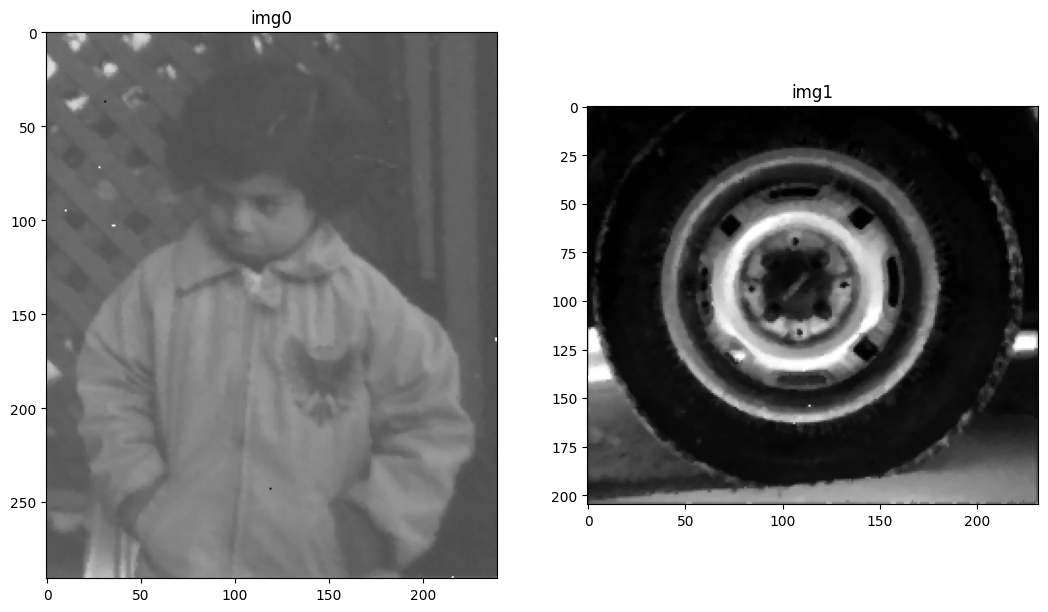

In [32]:
'''
(2) skimage median filter
'''
from skimage.filters import median
ret0 = median(img0)
ret1 = median(img1)
show_images([ret0, ret1], ['img0', 'img1'])

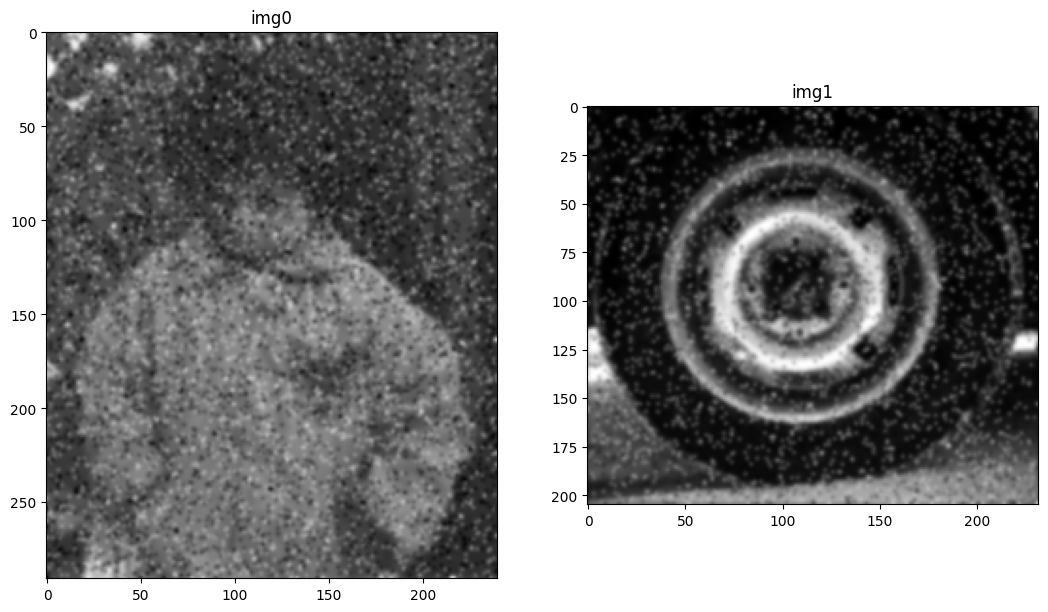

In [33]:
'''
(3) Gaussion Filters
'''
from skimage.filters import gaussian
ret0 = gaussian(img0)
ret1 = gaussian(img1)
show_images([ret0, ret1], ['img0', 'img1'])